In [1]:
# import dependencies
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# import files and upload them as dataframe
world_happiness_2015 = pd.read_csv("Input Data/world_happiness_2015.csv")
world_happiness_2016 = pd.read_csv("Input Data/world_happiness_2016.csv")
world_happiness_2017 = pd.read_csv("Input Data/world_happiness_2017.csv")
suicide_rates = pd.read_csv("Input Data/suicide_rates_overview1985-2016.csv")

In [3]:
suicide_rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
# see if there are any null values and data types
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
# checking info on numerical data types
suicide_rates.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [6]:
# filter out suicide rates to only include years that overlap with world happines report
suicide_rates_2015 = suicide_rates.loc[suicide_rates["year"] == 2015]
suicide_rates_2016 = suicide_rates.loc[suicide_rates["year"] == 2016]

In [7]:
world_happiness_2015

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
world_happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [9]:
# add year column to dataframe, so we can merge the two data sets 
world_happiness_2015["year"] = 2015
world_happiness_2016["year"] = 2016

In [10]:
suicide_rates_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 12 columns):
country               744 non-null object
year                  744 non-null int64
sex                   744 non-null object
age                   744 non-null object
suicides_no           744 non-null int64
population            744 non-null int64
suicides/100k pop     744 non-null float64
country-year          744 non-null object
HDI for year          0 non-null float64
 gdp_for_year ($)     744 non-null object
gdp_per_capita ($)    744 non-null int64
generation            744 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 75.6+ KB


In [11]:
suicide_rates_2015.rename(columns={'country':'Country'}, inplace=True)
suicide_rates_2016.rename(columns={'country':'Country'}, inplace=True)

C:\Users\charm\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [12]:
len(world_happiness_2015['Country'].unique())

158

In [13]:
data_2015 = pd.merge(world_happiness_2015, suicide_rates_2015, on="Country",how="right")
data_2016 = pd.merge(world_happiness_2016, suicide_rates_2016, on="Country",how="right")

In [14]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 24 columns):
Country                          744 non-null object
Region                           636 non-null object
Happiness Rank                   636 non-null float64
Happiness Score                  636 non-null float64
Standard Error                   636 non-null float64
Economy (GDP per Capita)         636 non-null float64
Family                           636 non-null float64
Health (Life Expectancy)         636 non-null float64
Freedom                          636 non-null float64
Trust (Government Corruption)    636 non-null float64
Generosity                       636 non-null float64
Dystopia Residual                636 non-null float64
year_x                           636 non-null float64
year_y                           744 non-null int64
sex                              744 non-null object
age                              744 non-null object
suicides_no                      744 

In [15]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 25 columns):
Country                          160 non-null object
Region                           150 non-null object
Happiness Rank                   150 non-null float64
Happiness Score                  150 non-null float64
Lower Confidence Interval        150 non-null float64
Upper Confidence Interval        150 non-null float64
Economy (GDP per Capita)         150 non-null float64
Family                           150 non-null float64
Health (Life Expectancy)         150 non-null float64
Freedom                          150 non-null float64
Trust (Government Corruption)    150 non-null float64
Generosity                       150 non-null float64
Dystopia Residual                150 non-null float64
year_x                           150 non-null float64
year_y                           160 non-null int64
sex                              160 non-null object
age                              160

In [16]:
# drop hdi column
data_2015 = data_2015.drop(columns=["HDI for year"])
data_2015 = data_2015.drop(columns=["year_x"])
data_2016 = data_2016.drop(columns=["HDI for year"])
data_2016 = data_2016.drop(columns=["year_x"])

In [17]:
# drop null value
data_2015.dropna(inplace=True)
data_2016.dropna(inplace=True)

In [18]:
data_2016

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,25-34 years,8,25029,31.96,Iceland2016,"20,304,098,101",64708,Millenials
1,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,55-74 years,10,33247,30.08,Iceland2016,"20,304,098,101",64708,Boomers
2,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,35-54 years,11,44024,24.99,Iceland2016,"20,304,098,101",64708,Generation X
3,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,15-24 years,6,24099,24.90,Iceland2016,"20,304,098,101",64708,Millenials
4,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,male,75+ years,1,8723,11.46,Iceland2016,"20,304,098,101",64708,Silent
5,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,25-34 years,2,23233,8.61,Iceland2016,"20,304,098,101",64708,Millenials
6,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,55-74 years,2,32963,6.07,Iceland2016,"20,304,098,101",64708,Boomers
7,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,15-24 years,0,22971,0.00,Iceland2016,"20,304,098,101",64708,Millenials
8,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,35-54 years,0,43216,0.00,Iceland2016,"20,304,098,101",64708,Generation X
9,Iceland,Western Europe,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,female,75+ years,0,11268,0.00,Iceland2016,"20,304,098,101",64708,Silent


In [19]:
df = pd.concat([data_2015, data_2016],sort=False)

In [20]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year_y,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,75+ years,143,275569,51.89,Switzerland2015,"679,289,166,858",86068,Silent,NaN,NaN
1,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,55-74 years,264,891482,29.61,Switzerland2015,"679,289,166,858",86068,Boomers,NaN,NaN
2,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,35-54 years,242,1248988,19.38,Switzerland2015,"679,289,166,858",86068,Generation X,NaN,NaN
3,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,25-34 years,80,586880,13.63,Switzerland2015,"679,289,166,858",86068,Millenials,NaN,NaN
4,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,male,15-24 years,62,482708,12.84,Switzerland2015,"679,289,166,858",86068,Millenials,NaN,NaN
5,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,75+ years,41,414205,9.90,Switzerland2015,"679,289,166,858",86068,Silent,NaN,NaN
6,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,35-54 years,111,1227126,9.05,Switzerland2015,"679,289,166,858",86068,Generation X,NaN,NaN
7,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,55-74 years,82,922222,8.89,Switzerland2015,"679,289,166,858",86068,Boomers,NaN,NaN
8,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,15-24 years,20,462559,4.32,Switzerland2015,"679,289,166,858",86068,Millenials,NaN,NaN
9,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,female,25-34 years,24,577973,4.15,Switzerland2015,"679,289,166,858",86068,Millenials,NaN,NaN


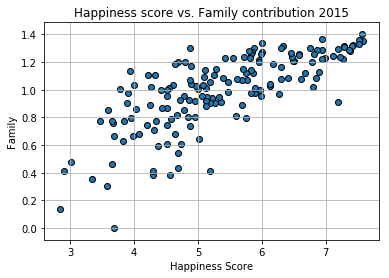

In [21]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2015["Happiness Score"], world_happiness_2015["Family"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Family contribution 2015")
plt.ylabel("Family")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_Family_Contribution_2015.png")

# Show plot
plt.show()

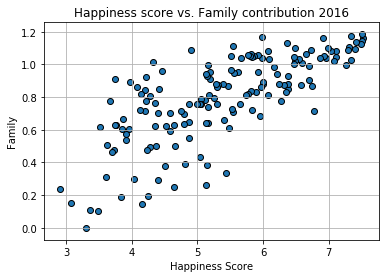

In [22]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2016["Happiness Score"], world_happiness_2016["Family"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Family contribution 2016")
plt.ylabel("Family")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_Family_Contribution_2016.png")

# Show plot
plt.show()

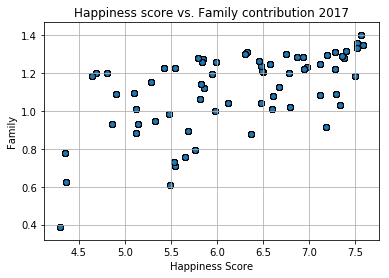

In [23]:
# Build a scatter plot for each data type
plt.scatter(df["Happiness Score"], df["Family"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Family contribution 2017")
plt.ylabel("Family")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_Family_Contribution_2017.png")

# Show plot
plt.show()

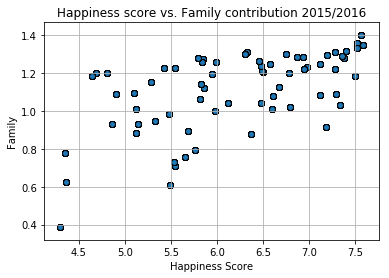

In [24]:
# Build a scatter plot for each data type
plt.scatter(df["Happiness Score"], df["Family"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Family contribution 2015/2016")
plt.ylabel("Family")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_Family_Contribution_2015_&_2016.png")

# Show plot
plt.show()

In [27]:
# Filter the DataFrame down only to those columns to chart
region_and_happiness = df[["Region", "Family","Freedom","Happiness Score"]]

# Set the index to be "State" so they will be used as labels
region_and_happiness = region_and_happiness.set_index("Region")

region_and_happiness.head()

,Family,Freedom,Happiness Score
Region,,,
Western Europe,1.34951,0.66557,7.587
Western Europe,1.34951,0.66557,7.587
Western Europe,1.34951,0.66557,7.587
Western Europe,1.34951,0.66557,7.587
Western Europe,1.34951,0.66557,7.587


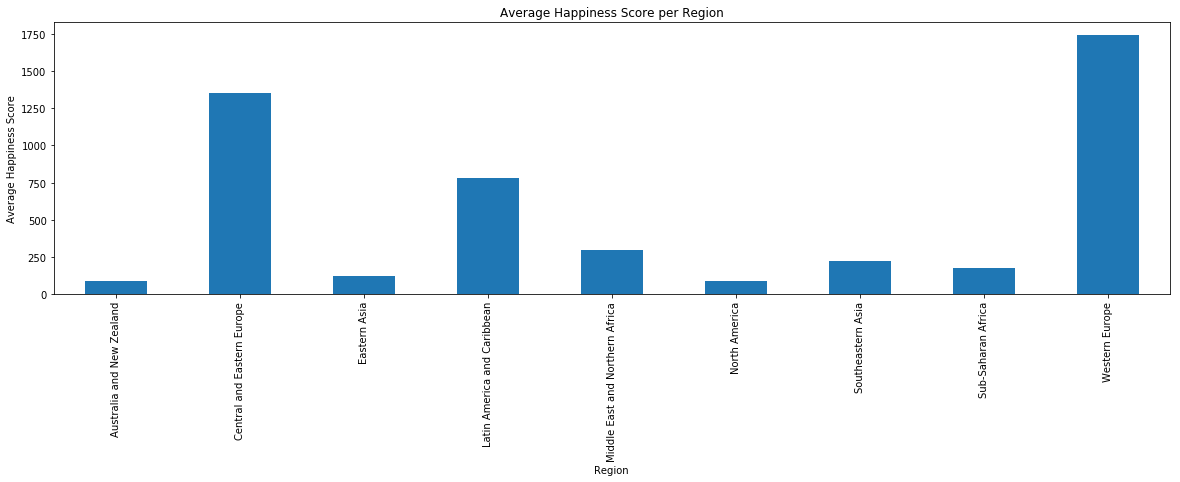

<Figure size 432x288 with 0 Axes>

In [28]:
# Group by Region
region_groupped = region_and_happiness.groupby(["Region"])
happiness_sum = region_groupped["Happiness Score"].sum()
# Set a Title and labels
plt.title("Average Happiness Score per Region")
plt.xlabel("Region")
plt.ylabel("Average Happiness Score")
# Use DataFrame.plot() in order to create a bar chart of the data
happiness_sum.plot(kind="bar", figsize=(20,5))

# Set a title for the chart
plt.title("Average Happiness Score per Region")

plt.show()
plt.savefig("Output_Plots/Avg_Happiness_Score_Per_Region.png")
plt.tight_layout()

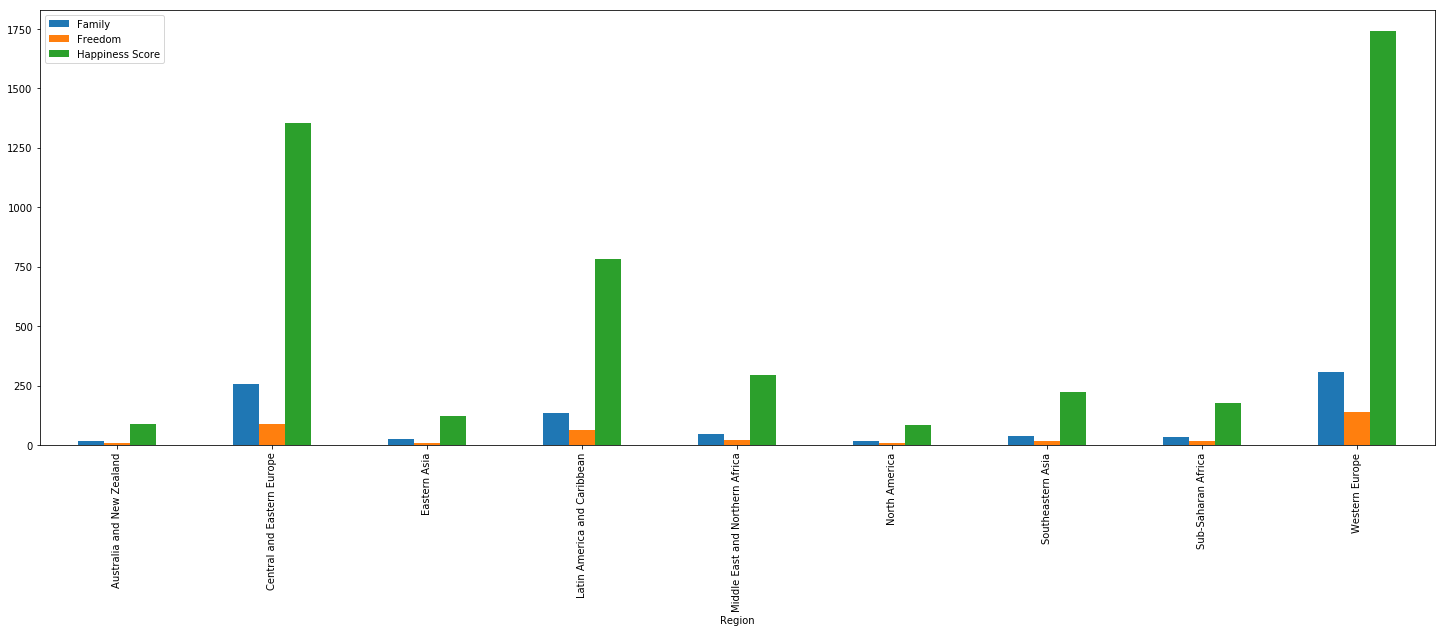

<Figure size 432x288 with 0 Axes>

In [29]:
# Group by Region
region_groupped = region_and_happiness.groupby(["Region"])
happiness_region_sum = region_groupped["Family", "Freedom", "Happiness Score"].sum()

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = happiness_region_sum.plot(kind="bar", figsize=(25,8))

plt.show()
plt.savefig("Output_Plots/Correlattion_between_Family_Freedom_Happiness.png")
plt.tight_layout()

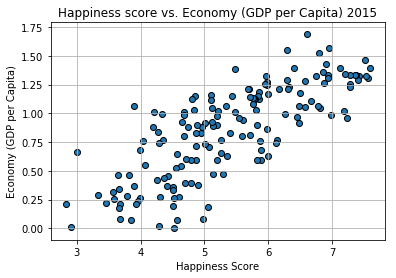

In [30]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2015["Happiness Score"], world_happiness_2015["Economy (GDP per Capita)"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Economy (GDP per Capita) 2015")
plt.ylabel("Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_GDP_per_Capita_2015.png")

# Show plot
plt.show()

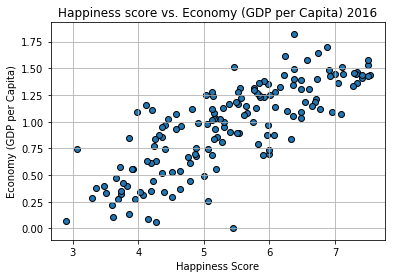

In [31]:
# Build a scatter plot for each data type
plt.scatter(world_happiness_2016["Happiness Score"], world_happiness_2016["Economy (GDP per Capita)"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. Economy (GDP per Capita) 2016")
plt.ylabel("Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_GDP_per_Capita_2016.png")

# Show plot
plt.show()

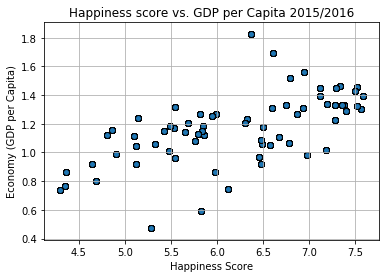

In [32]:
# Build a scatter plot for each data type
plt.scatter(df["Happiness Score"], df["Economy (GDP per Capita)"], marker="o", edgecolor="black")
# Incorporate the other graph properties
plt.title("Happiness score vs. GDP per Capita 2015/2016")
plt.ylabel("Economy (GDP per Capita)")
plt.xlabel("Happiness Score")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Happiness_Score_vs_GDP_per_Capita_2015_&_2016.png")

# Show plot
plt.show()

In [33]:
# Filter the DataFrame down only to those columns to chart
country_and_gdp = df[["Trust (Government Corruption)", "Country","Economy (GDP per Capita)","Happiness Score"]]

# Set the index to be "State" so they will be used as labels
country_and_gdp = country_and_gdp.set_index("Country")

country_and_gdp.head()

,Trust (Government Corruption),Economy (GDP per Capita),Happiness Score
Country,,,
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587
Switzerland,0.41978,1.39651,7.587


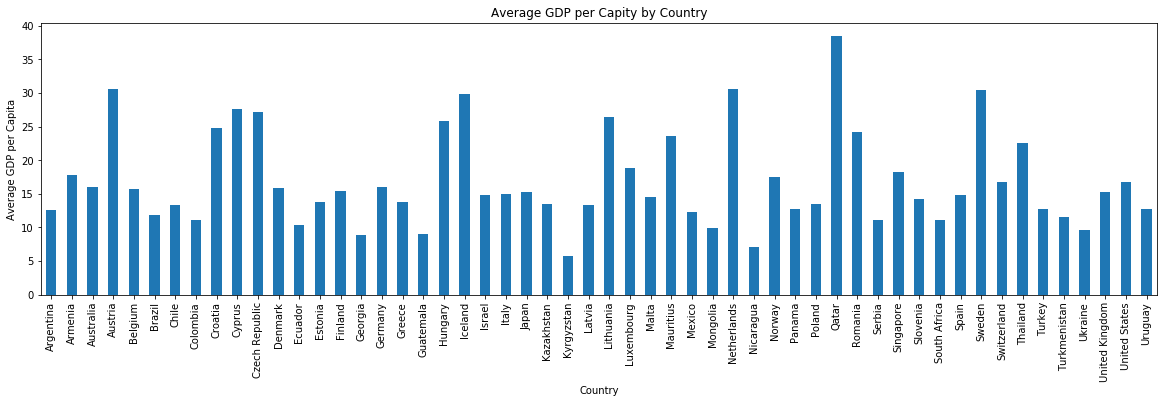

<Figure size 432x288 with 0 Axes>

In [34]:
# Group by Country
country_groupped = country_and_gdp.groupby(["Country"])
gdp_sum = country_groupped["Economy (GDP per Capita)"].sum()
# Set a Title and labels
plt.title("Average GDP per Capity by Country")
plt.xlabel("Country")
plt.ylabel("Average GDP per Capita")
# Use DataFrame.plot() in order to create a bar chart of the data
gdp_sum.plot(kind="bar", figsize=(20,5))

# Set a title for the chart
plt.title("Average GDP per Capity by Country")

plt.show()
plt.savefig("Output_Plots/Avg_GDP_by_Country.png")
plt.tight_layout()

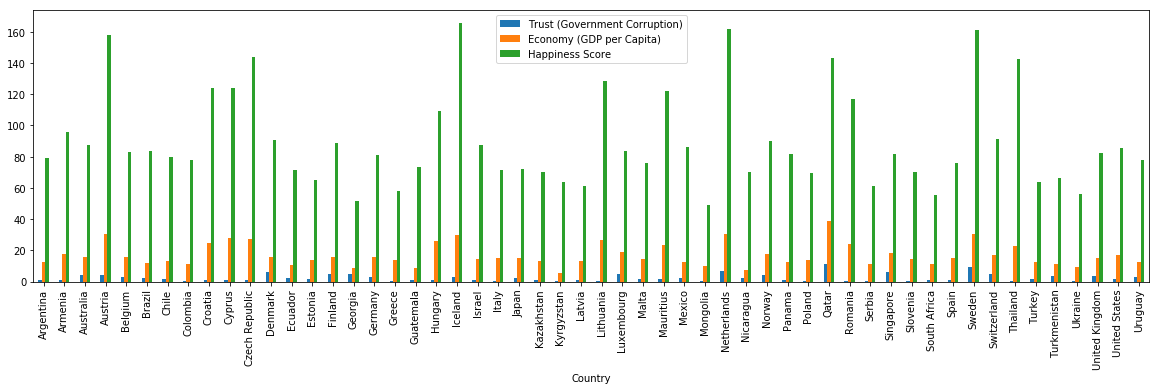

<Figure size 432x288 with 0 Axes>

In [35]:
# Group by Region
country_groupped = country_and_gdp.groupby(["Country"])
gdp_sum = country_groupped["Trust (Government Corruption)", "Economy (GDP per Capita)", "Happiness Score"].sum()

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = gdp_sum.plot(kind="bar", figsize=(20,5))

plt.show()
plt.savefig("Output_Plots/Correlattion_between_Government_Trust_GDP_Happiness_Score.png")
plt.tight_layout()